In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# raw1 = pd.read_excel('Venu3S_FFP.xlsx',sheet_name='Raw Data_ASSY', 
#                      usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item11','Item46','Item42',
#                               'Item238','Item89'])

In [78]:
# raw1.to_excel('tweak_Venu3S_FFP_ASSY.xlsx')

In [79]:
raw = pd.read_excel('tweak_Venu3S_FFP_ASSY.xlsx')

In [80]:
plt.style.use('fivethirtyeight')

In [81]:
# chitwig = [16144353,16144364,16126909,16127033,16127104,16144368,16144371,16127152,16127153,16127155]
# sharpeye = [16126905,16126906,16126907,16127031,16127032,16127105,16127106,16127151,16127154,16127156]

In [82]:
vendor = pd.read_excel('bezelvendor.xlsx')

def

In [97]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(vendor.chitwing.drop_duplicates()),'chitwing').where(~raw.JobNO.isin(vendor.sharpeye.drop_duplicates()),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO','Vendor']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )
tweak_df(raw,16578,46,-20).sample(5)

,ProcessType,Result,Item46,JobNO,Vendor
1828,Venu3S_AutoCT,True,0.149998,16126071,chitwing
11880,Venu3S_AutoCT,True,-0.859999,16142524,chitwing
14661,Venu3S_AutoCT,True,0.230000,16142525,chitwing
4248,Venu3S_AutoCT,False,-4.299998,16126273,chitwing
2264,Venu3S_AutoCT,True,-0.699999,16126073,sharpeye


In [84]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = tweak_df(df,itemnametype, item, lower),
    x=f'Item{item}',
    hue='Result',
    hue_order=[1,0],
    alpha=0.5)
    )

In [85]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = tweak_df(df,itemnametype, item, lower),
    x=f'Item{item}',
    y='Vendor',
    hue='Result',
    hue_order=[1,0],
    alpha=0.5)
    )

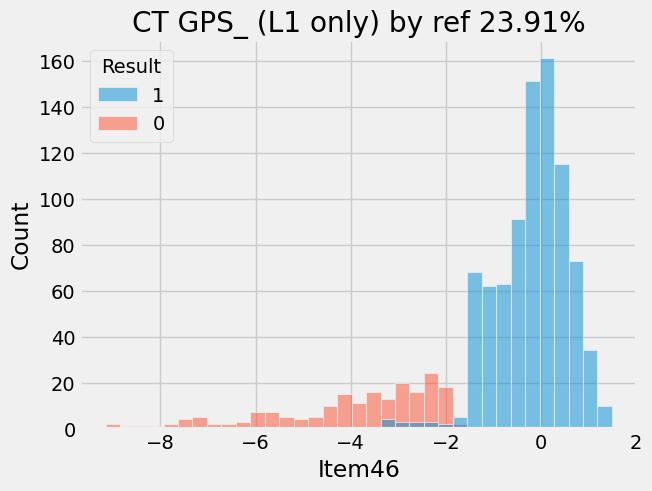

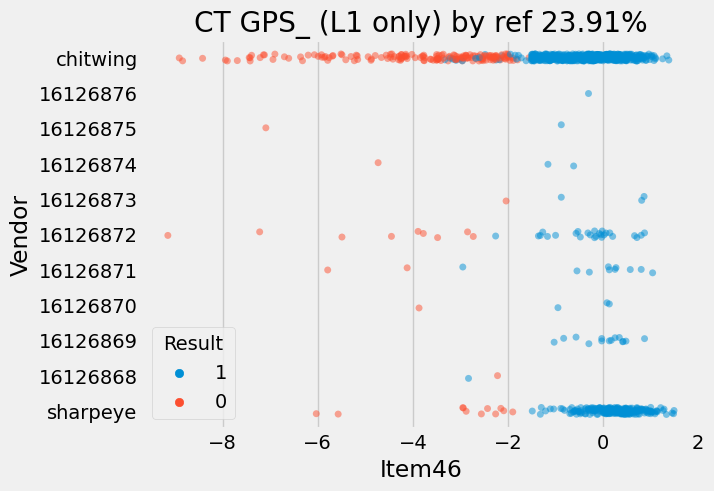

In [93]:
my_hisplot(raw,16578,46,-20, 'CT GPS_ (L1 only) by ref 23.91%');
my_stripplot(raw,16578,46,-20, 'CT GPS_ (L1 only) by ref 23.91%');

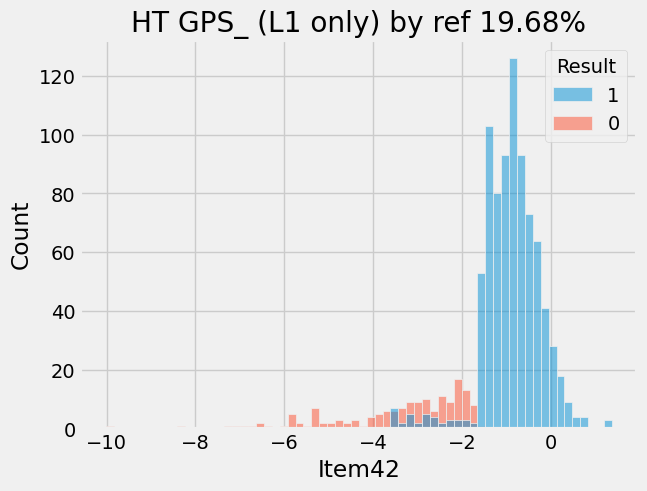

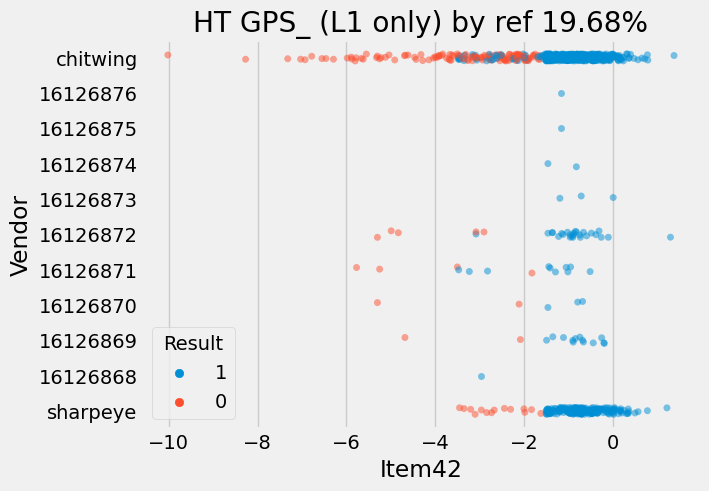

In [94]:
my_hisplot(raw,16579,42,-20, 'HT GPS_ (L1 only) by ref 19.68%');
my_stripplot(raw,16579,42,-20, 'HT GPS_ (L1 only) by ref 19.68%');

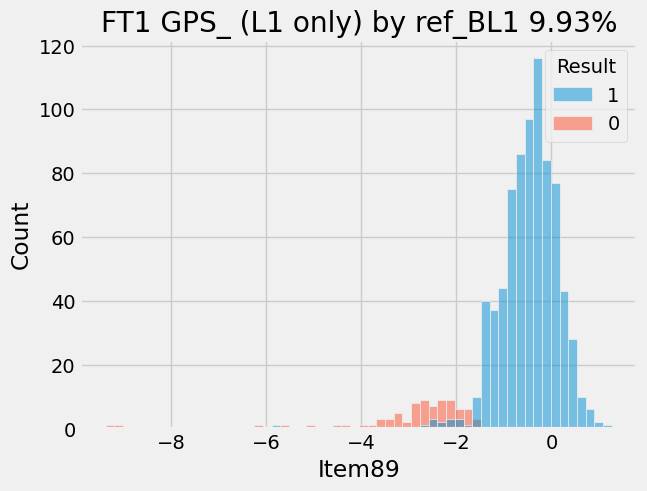

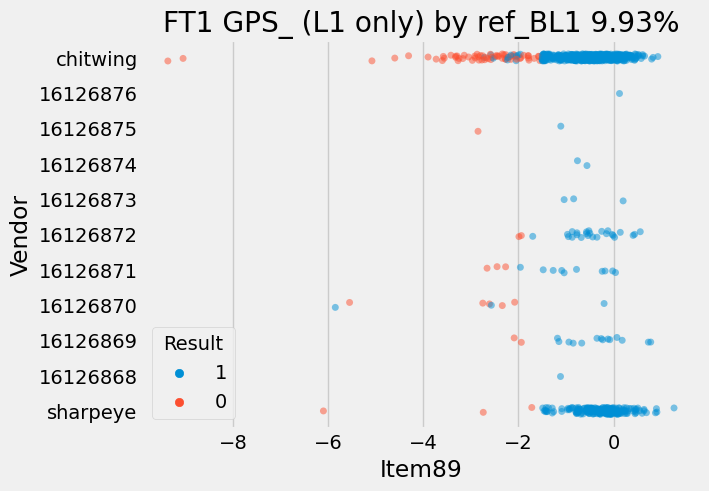

In [95]:
my_hisplot(raw,16585,89,-20, 'FT1 GPS_ (L1 only) by ref_BL1 9.93%');
my_stripplot(raw,16585,89,-20, 'FT1 GPS_ (L1 only) by ref_BL1 9.93%');

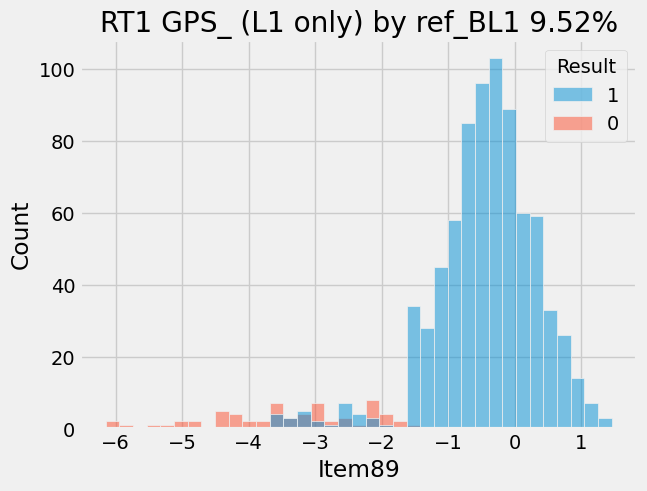

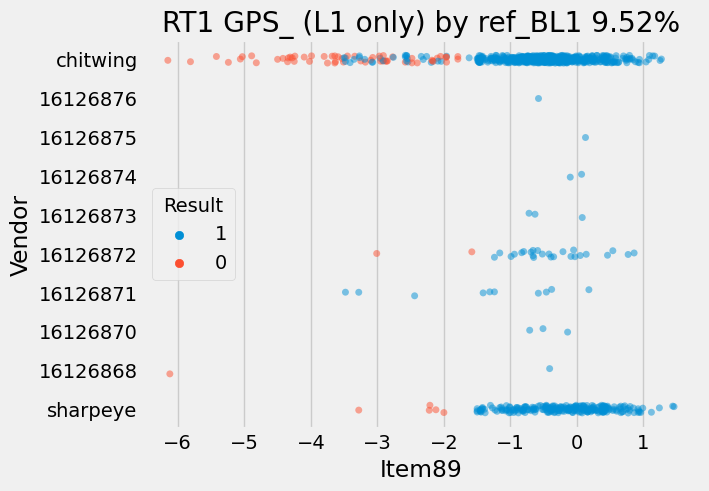

In [96]:
my_hisplot(raw,16586,89,-20, 'RT1 GPS_ (L1 only) by ref_BL1 9.52%');
my_stripplot(raw,16586,89,-20, 'RT1 GPS_ (L1 only) by ref_BL1 9.52%');